# Titanic Dataset

## Data Import and Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv('train.csv')

What the data looks like

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dropping data that won't be useful.

In [4]:
titanic.drop(['PassengerId','Ticket'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [5]:
titanic['Name'].str.split(',')[1][1].split()[0]

'Mrs.'

In [6]:
titanic['Title'] = pd.Series()
titanic['Surname'] = pd.Series()

for i in range(0,len(titanic['Name'])):
    titanic['Title'][i] = titanic['Name'].str.split(',')[i][1].split()[0]
    titanic['Surname'][i] = titanic['Name'].str.split(',')[i][0]

C:\Users\Crispy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Crispy\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Crispy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
by_surname = titanic.groupby('Surname').count()

In [8]:
by_surname.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
Surname,,,,,,,,,,,
Abbing,1,1,1,1,1,1,1,1,0,1,1
Abbott,2,2,2,2,2,2,2,2,0,2,2
Abelson,2,2,2,2,2,2,2,2,0,2,2
Adahl,1,1,1,1,1,1,1,1,0,1,1
Adams,1,1,1,1,1,1,1,1,0,1,1


In [9]:
titanic = titanic.join(by_surname['Name'],on='Surname',how='inner',rsuffix='GB',sort=True).sort_index()

In [10]:
titanic.rename(columns={'NameGB':'FamilyMembers'},inplace=True)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Surname,FamilyMembers
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.,Braund,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.,Cumings,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.,Heikkinen,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.,Futrelle,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.,Allen,2
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,Mr.,Moran,3
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,Mr.,McCarthy,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,Master.,Palsson,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S,Mrs.,Johnson,6
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C,Mrs.,Nasser,2


Shared Cabin?

In [11]:
cabincount = titanic['Cabin'].value_counts()
cabincount>1

B96 B98             True
C23 C25 C27         True
G6                  True
F33                 True
F2                  True
C22 C26             True
D                   True
E101                True
B28                 True
B22                 True
C126                True
D26                 True
B57 B59 B63 B66     True
E8                  True
D33                 True
B18                 True
C78                 True
B51 B53 B55         True
C125                True
E44                 True
C123                True
E121                True
C52                 True
B58 B60             True
B49                 True
C93                 True
D36                 True
D17                 True
F G73               True
E33                 True
                   ...  
A24                False
D6                 False
C32                False
B80                False
E38                False
C46                False
B79                False
C99                False
E49                False


In [12]:
titanic = titanic.join(cabincount>1, how='left', rsuffix='C', on='Cabin')
titanic.rename(columns={'CabinC':'CabinShare'},inplace=True)


In [13]:
titanic['CabinShare'].fillna(0, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Surname,FamilyMembers,CabinShare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.,Braund,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.,Cumings,1,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.,Heikkinen,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.,Futrelle,2,True
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.,Allen,2,0


Get indicator variables for categroical data

In [14]:
titanic = pd.get_dummies(titanic, columns=['Sex','Embarked','Title','CabinShare'],drop_first=True)

In [15]:
titanic.isnull().sum()
#Null data in Age

Survived             0
Pclass               0
Name                 0
Age                177
SibSp                0
Parch                0
Fare                 0
Cabin              687
Surname              0
FamilyMembers        0
Sex_male             0
Embarked_Q           0
Embarked_S           0
Title_Col.           0
Title_Don.           0
Title_Dr.            0
Title_Jonkheer.      0
Title_Lady.          0
Title_Major.         0
Title_Master.        0
Title_Miss.          0
Title_Mlle.          0
Title_Mme.           0
Title_Mr.            0
Title_Mrs.           0
Title_Ms.            0
Title_Rev.           0
Title_Sir.           0
Title_the            0
CabinShare_True      0
dtype: int64

In [16]:
#titanic.drop(['Title_Col.','Title_Don.','Title_Jonkheer.','Title_Lady.','Title_Major.','Title_Mlle.','Title_Mme.','Title_Sir.','Title_the'],axis=1)



### Make predictions for age

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

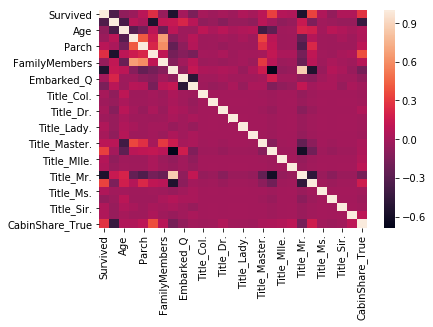

In [18]:
sns.heatmap(titanic.corr(), annot=False)

Age seems to be best correlated with Pclass and SibSp

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 30 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null float64
Cabin              204 non-null object
Surname            891 non-null object
FamilyMembers      891 non-null int64
Sex_male           891 non-null uint8
Embarked_Q         891 non-null uint8
Embarked_S         891 non-null uint8
Title_Col.         891 non-null uint8
Title_Don.         891 non-null uint8
Title_Dr.          891 non-null uint8
Title_Jonkheer.    891 non-null uint8
Title_Lady.        891 non-null uint8
Title_Major.       891 non-null uint8
Title_Master.      891 non-null uint8
Title_Miss.        891 non-null uint8
Title_Mlle.        891 non-null uint8
Title_Mme.         891 non-null uint8
Title_Mr.     

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lmAge = LinearRegression()

In [22]:
lmAge.fit(titanic.dropna()[['Pclass','SibSp','Parch','Fare','FamilyMembers','CabinShare_True']],titanic.dropna()['Age'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
AgePredictions = lmAge.predict(titanic[['Pclass','SibSp','Parch','Fare','FamilyMembers','CabinShare_True']])
AgePredictions = pd.Series(AgePredictions)
AgePredictions.head()

0    24.671869
1    41.125687
2    26.104097
3    36.310592
4    26.374362
dtype: float64

Replace nulls with predicted age

In [24]:
titanic['Age'].replace(np.nan,AgePredictions,inplace=True)

# Make predictions about survival

Train test split

In [25]:
from sklearn.cross_validation import train_test_split

C:\Users\Crispy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
X = titanic.drop(['Name','Cabin','Surname','Survived'], axis=1)
y = titanic['Survived']

In [27]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,FamilyMembers,Sex_male,Embarked_Q,Embarked_S,Title_Col.,...,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Title_the,CabinShare_True
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.318461,0.523008,0.381594,32.204208,1.882155,0.647587,0.086420,0.722783,0.002245,...,0.204265,0.002245,0.001122,0.580247,0.140292,0.001122,0.006734,0.001122,0.001122,0.115600
std,0.836071,13.519844,1.102743,0.806057,49.693429,1.488014,0.477990,0.281141,0.447876,0.047351,...,0.403390,0.047351,0.033501,0.493796,0.347485,0.033501,0.081830,0.033501,0.033501,0.319925
min,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.500000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,26.651205,0.000000,0.000000,14.454200,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,36.163809,1.000000,0.000000,31.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,9.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Lin Reg

In [30]:
lmSurv = LinearRegression()

In [31]:
lmSurv.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
lmPredictions = lmSurv.predict(X_test)

In [33]:
lmPredictions = pd.Series(lmPredictions).round()


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(confusion_matrix(y_test,lmPredictions))

[[152  22]
 [ 25  69]]


In [36]:
print(classification_report(y_test,lmPredictions))

             precision    recall  f1-score   support

          0       0.86      0.87      0.87       174
          1       0.76      0.73      0.75        94

avg / total       0.82      0.82      0.82       268



# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
model = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [39]:
rfc = GridSearchCV(model,param_grid)

In [40]:
rfc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
rfcPredictions = rfc.predict(X_test)

In [42]:
print(confusion_matrix(y_test,rfcPredictions))

[[145  29]
 [ 24  70]]


In [43]:
print(classification_report(y_test,rfcPredictions))

             precision    recall  f1-score   support

          0       0.86      0.83      0.85       174
          1       0.71      0.74      0.73        94

avg / total       0.81      0.80      0.80       268



# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
model = DecisionTreeClassifier()
param_grid = dict(min_samples_split=list(range(2,50)),criterion=['gini','entropy'])

In [46]:
dt = GridSearchCV(model,param_grid)

In [47]:
dt.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
dtPredictions = dt.predict(X_test)

In [49]:
print(confusion_matrix(y_test,dtPredictions))

[[153  21]
 [ 32  62]]


In [50]:
print(classification_report(y_test,dtPredictions))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       174
          1       0.75      0.66      0.70        94

avg / total       0.80      0.80      0.80       268



# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lg = LogisticRegression()

In [53]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
lgPredictions = lg.predict(X_test)

In [55]:
lgPredictions = pd.Series(lgPredictions)


In [56]:
print(confusion_matrix(y_test,lgPredictions))

[[148  26]
 [ 25  69]]


In [57]:
print(classification_report(y_test,lgPredictions))

             precision    recall  f1-score   support

          0       0.86      0.85      0.85       174
          1       0.73      0.73      0.73        94

avg / total       0.81      0.81      0.81       268



# Neural Network

In [58]:
import tensorflow as tf
import tensorflow.contrib.learn as learn

In [59]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Surname', 'FamilyMembers', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Title_Col.', 'Title_Don.', 'Title_Dr.', 'Title_Jonkheer.',
       'Title_Lady.', 'Title_Major.', 'Title_Master.', 'Title_Miss.',
       'Title_Mlle.', 'Title_Mme.', 'Title_Mr.', 'Title_Mrs.', 'Title_Ms.',
       'Title_Rev.', 'Title_Sir.', 'Title_the', 'CabinShare_True'],
      dtype='object')

In [60]:
classifier = learn.DNNClassifier(hidden_units=[13],optimizer="Adam", n_classes=2,feature_columns=learn.infer_real_valued_columns_from_input(X))
classifier.fit(X_train, y_train, steps=200, batch_size=32)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001884939A128>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Crispy\\AppData\\Local\\Temp\\tmpy01canzi'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructi

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x000001884939A160>, 'hidden_units': [13], 'feature_columns': (_RealValuedColumn(column_name='', dimension=26, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': 'Adam', 'activation_fn': <function relu at 0x0000018846A36A60>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [61]:
DNNPredictions = classifier.predict(X_test)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from C:\Users\Crispy\AppData\Local\Temp\tmpy01canzi\model.ckpt-200


In [62]:
DNNPredictions = list(DNNPredictions)

In [63]:
print(confusion_matrix(y_test,DNNPredictions))
print(classification_report(y_test,DNNPredictions))

[[158  16]
 [ 34  60]]
             precision    recall  f1-score   support

          0       0.82      0.91      0.86       174
          1       0.79      0.64      0.71        94

avg / total       0.81      0.81      0.81       268



# Predict the Test data

In [64]:
titanic_test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [65]:
gender.head()
#target format

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [66]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [67]:
titanic_test.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [68]:
titanic_test['Title'] = pd.Series()
titanic_test['Surname'] = pd.Series()

for i in range(0,len(titanic_test['Name'])):
    titanic_test['Title'][i] = titanic_test['Name'].str.split(',')[i][1].split()[0]
    titanic_test['Surname'][i] = titanic_test['Name'].str.split(',')[i][0]

C:\Users\Crispy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Crispy\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Crispy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
by_surname_test = titanic_test.groupby('Surname').count()

In [70]:
titanic_test = titanic_test.join(by_surname_test['Name'],on='Surname',how='inner',rsuffix='GB',sort=True).sort_index()

In [71]:
titanic_test.rename(columns={'NameGB':'FamilyMembers'},inplace=True)

In [72]:
cabincount_test = titanic_test['Cabin'].value_counts()

In [73]:
titanic_test = titanic_test.join(cabincount_test>1, how='left', rsuffix='C', on='Cabin')
titanic_test.rename(columns={'CabinC':'CabinShare'},inplace=True)


In [74]:
titanic_test['CabinShare'].fillna(0, inplace=True)
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Surname,FamilyMembers,CabinShare
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,Mr.,Kelly,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,Mrs.,Wilkes,1,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,Mr.,Myles,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,Mr.,Wirz,1,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,Mrs.,Hirvonen,1,0


In [75]:
titanic_test['Title'].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: Title, dtype: int64

In [76]:
titanic_test = pd.get_dummies(titanic_test, columns=['Sex','Embarked','Title','CabinShare'],drop_first=True)

In [77]:
titanic_test['Title_Col.'] = np.zeros(418)
titanic_test['Title_Don.'] = np.zeros(418)
titanic_test['Title_Jonkheer.'] = np.zeros(418)
titanic_test['Title_Lady.'] = np.zeros(418)
titanic_test['Title_Major.'] = np.zeros(418)
titanic_test['Title_Mlle.'] = np.zeros(418)
titanic_test['Title_Mme.'] = np.zeros(418)
titanic_test['Title_Sir.'] = np.zeros(418)
titanic_test['Title_the'] = np.zeros(418)
                                                                  
titanic_test.drop('Title_Dona.', axis=1, inplace=True)

In [78]:
titanic_test.isnull().sum()

Pclass               0
Name                 0
Age                 86
SibSp                0
Parch                0
Fare                 1
Cabin              327
Surname              0
FamilyMembers        0
Sex_male             0
Embarked_Q           0
Embarked_S           0
Title_Dr.            0
Title_Master.        0
Title_Miss.          0
Title_Mr.            0
Title_Mrs.           0
Title_Ms.            0
Title_Rev.           0
CabinShare_True      0
Title_Col.           0
Title_Don.           0
Title_Jonkheer.      0
Title_Lady.          0
Title_Major.         0
Title_Mlle.          0
Title_Mme.           0
Title_Sir.           0
Title_the            0
dtype: int64

In [79]:
titanic_test['Fare'].replace(np.nan,np.mean(titanic_test['Fare']),inplace=True)
#replace missing Fare value with mean Fare

In [80]:
AgePredictions_test = lmAge.predict(titanic_test[['Pclass','SibSp','Parch','Fare','FamilyMembers','CabinShare_True']])
AgePredictions_test = pd.Series(AgePredictions_test)
AgePredictions_test.head()

0    26.105580
1    24.403538
2    34.935367
3    26.092682
4    20.431203
dtype: float64

In [81]:
titanic_test['Age'].replace(np.nan,AgePredictions_test,inplace=True)

In [82]:
titanic_test.isnull().sum()

Pclass               0
Name                 0
Age                  0
SibSp                0
Parch                0
Fare                 0
Cabin              327
Surname              0
FamilyMembers        0
Sex_male             0
Embarked_Q           0
Embarked_S           0
Title_Dr.            0
Title_Master.        0
Title_Miss.          0
Title_Mr.            0
Title_Mrs.           0
Title_Ms.            0
Title_Rev.           0
CabinShare_True      0
Title_Col.           0
Title_Don.           0
Title_Jonkheer.      0
Title_Lady.          0
Title_Major.         0
Title_Mlle.          0
Title_Mme.           0
Title_Sir.           0
Title_the            0
dtype: int64

# Linear Regression Prediction

In [83]:
lmPredictions_test = lmSurv.predict(titanic_test.drop(['Name','Cabin','Surname'], axis=1))

In [84]:
lmPredictions_test = pd.Series(lmPredictions_test.round())
lmPredictions_test.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
dtype: float64

In [85]:
lmtest = gender.drop('Survived',axis=1)
lmtest['Survived'] = abs(lmPredictions_test).apply(int)

In [86]:
lmtest.to_csv('submission-lmFE.csv',index=False)

# Random Forest Prediction

In [87]:
rfcPredictions_test = rfc.predict(titanic_test.drop(['Name','Cabin','Surname'], axis=1))

In [88]:
rfcPredictions_test = pd.Series(rfcPredictions_test)
rfcPredictions_test.head()

0    0
1    0
2    0
3    0
4    1
dtype: int64

In [89]:
rfctest = gender.drop('Survived',axis=1)
rfctest['Survived'] = abs(rfcPredictions_test).apply(int)

In [90]:
rfctest.to_csv('submission-rfcFE.csv',index=False)

# Decision Tree Prediction

In [91]:
dtPredictions_test = dt.predict(titanic_test.drop(['Name','Cabin','Surname'], axis=1))

dtPredictions_test = pd.Series(dtPredictions_test)

dttest = gender.drop('Survived',axis=1)
dttest['Survived'] = abs(dtPredictions_test).apply(int)

dttest.to_csv('submission-dtFE.csv',index=False)

# Logistic Regression

In [92]:
lgPredictions_test = lg.predict(titanic_test.drop(['Name','Cabin','Surname'], axis=1))

lgPredictions_test = pd.Series(lgPredictions_test)

lgtest = gender.drop('Survived',axis=1)
lgtest['Survived'] = abs(lgPredictions_test).apply(int)

lgtest.to_csv('submission-lgFE.csv',index=False)

# Neural Network

In [93]:
DNNPredictions_test = classifier.predict(titanic_test.drop(['Name','Cabin','Surname'], axis=1))

DNNPredictions_test = pd.Series(DNNPredictions_test)

DNNtest = gender.drop('Survived',axis=1)
DNNtest['Survived'] = abs(DNNPredictions_test).apply(int)

DNNtest.to_csv('submission-DNNFE.csv',index=False)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from C:\Users\Crispy\AppData\Local\Temp\tmpy01canzi\model.ckpt-200
